In [1]:
#Libraries 
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

                                                                        1. IMPORT DATA AND INSPECTING

In [2]:
#Loading Data 
df = pd.read_excel(r"/home/sinbad/Desktop/DATASET.xlsx")

In [3]:
#Displaying data 
df.head()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,October,2023,577098.0
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,February,2024,1005058.0
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,February,2023,436704.0
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),March,2023,NaN
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,August,2023,NaN


In [4]:
df.tail()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
445,KINONDONI PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,January,2023,552827.0
446,KINONDONI PHARMACY,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),January,2023,434411.0
447,KINONDONI PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,January,2023,NaN
448,Kigamboni Pharmacy,40030134AC,Copper T IUD,January,2023,27.4
449,Kigamboni Pharmacy,10010108AC,CONDOMS,January,2023,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pharmacy Name  450 non-null    object 
 1   Product Code   450 non-null    object 
 2   Product Name   450 non-null    object 
 3   Month          450 non-null    object 
 4   Year           450 non-null    int64  
 5   Sales          351 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 21.2+ KB


In [6]:
# Convert Month and Year to datetime
df['Timeline'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%B %Y')

In [7]:
df

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales,Timeline
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,October,2023,577098.0,2023-10-01
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,February,2024,1005058.0,2024-02-01
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,February,2023,436704.0,2023-02-01
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),March,2023,NaN,2023-03-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,August,2023,NaN,2023-08-01
...,...,...,...,...,...,...,...
445,KINONDONI PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,January,2023,552827.0,2023-01-01
446,KINONDONI PHARMACY,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),January,2023,434411.0,2023-01-01
447,KINONDONI PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,January,2023,NaN,2023-01-01
448,Kigamboni Pharmacy,40030134AC,Copper T IUD,January,2023,27.4,2023-01-01


In [8]:
# # Set the Date as the index
# df.set_index('Timeline', inplace=True)

In [9]:
# # Create a mapping dictionary for month names to numbers
# month_mapping = {
#     'January': 1, 'February': 2, 'March': 3, 'April': 4,
#     'May': 5, 'June': 6, 'July': 7, 'August': 8,
#     'September': 9, 'October': 10, 'November': 11, 'December': 12
# }

In [10]:
# # Map the month names to numbers
# df['Month'] = df['Month'].map(month_mapping)

In [11]:
# # Combine Year and Month into a single datetime column with the default day as 1
# df['Date'] = pd.to_datetime(df.assign(Day=1)[['Year', 'Month', 'Day']])

# # Set the Date column as the index
# df.set_index('Date', inplace=True)

# Optionally, drop the original Year and Month columns
df.drop(columns=['Year', 'Month'], inplace=True)

In [12]:
df.head()

,Pharmacy Name,Product Code,Product Name,Sales,Timeline
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,577098.0,2023-10-01
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,1005058.0,2024-02-01
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,436704.0,2023-02-01
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),NaN,2023-03-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2023-08-01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Pharmacy Name  450 non-null    object        
 1   Product Code   450 non-null    object        
 2   Product Name   450 non-null    object        
 3   Sales          351 non-null    float64       
 4   Timeline       450 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 17.7+ KB


                                                                        2. VISUALIZE THE TIME SERIES DATA     

In [14]:
df2 = df.groupby(['Timeline'])['Sales'].sum().reset_index()

In [15]:
df2

,Timeline,Sales
0,2023-01-01,8.561905e+06
1,2023-02-01,8.898086e+06
2,2023-03-01,7.675084e+06
3,2023-04-01,1.579313e+07
4,2023-05-01,9.011804e+06
5,2023-06-01,1.238357e+07
6,2023-07-01,8.305478e+06
7,2023-08-01,9.128949e+06
8,2023-09-01,7.579946e+06
9,2023-10-01,8.389505e+06


In [16]:
# plt.figure(figsize=(12,4))
# sns.lineplot(x = 'Timeline', y = 'Sales', data = df2)
# plt.show()

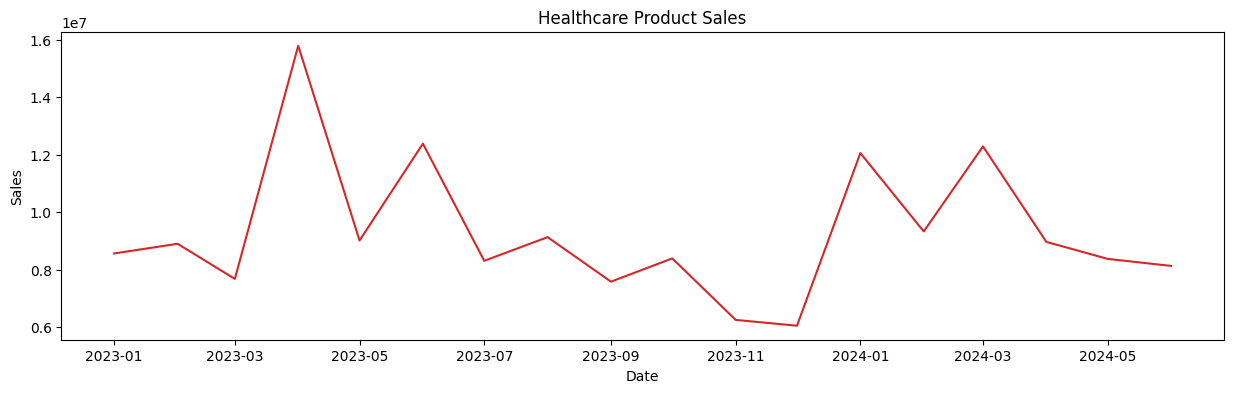

In [17]:
# Define the plot function
def plot(df, x, y, title="", xlabel='Date', ylabel='Sales', dpi=100):
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(x.values, y.values, color='tab:red')  # Convert to numpy arrays
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# Plot using df2
plot(df2, x=df2['Timeline'], y=df2['Sales'], title='Healthcare Product Sales')

<Figure size 5000x4000 with 0 Axes>

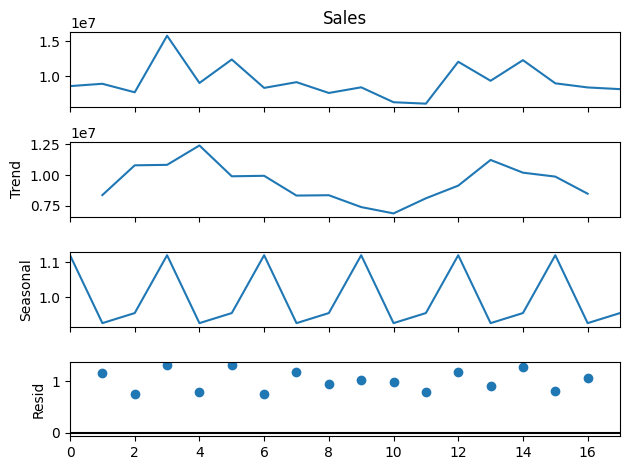

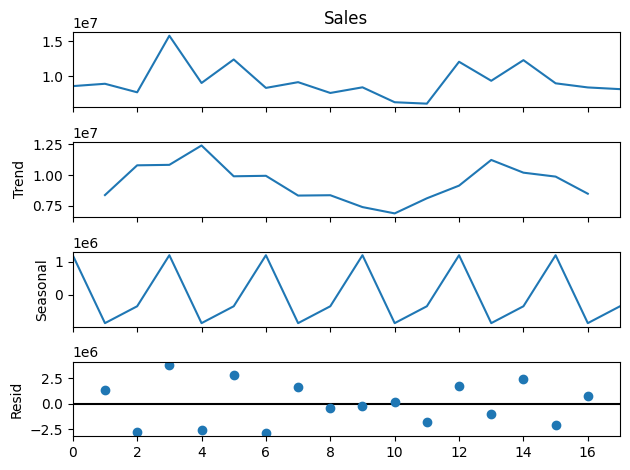

In [18]:
#Decomposition 
multiplicative = seasonal_decompose(df2['Sales'], model =  'multiplicative', period = 3)
additive = seasonal_decompose(df2['Sales'], model =  'additive', period = 3)

plt.figure(figsize = (50,40))
multiplicative.plot()
additive.plot()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

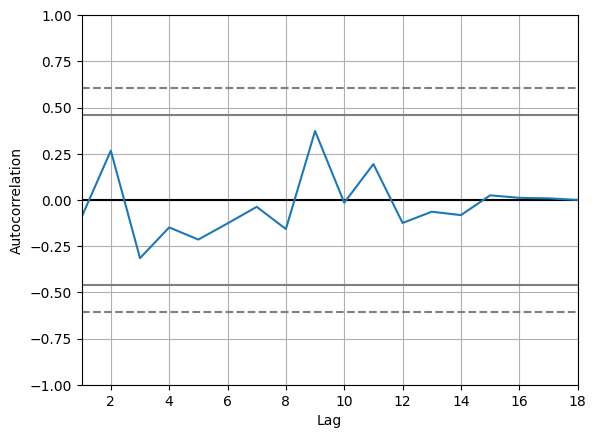

In [19]:
#Autocorellation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Sales'].to_list())

In [20]:
# Check for stationarity using Augmented Dickey-Fuller test
# Stationary p-value < 0.05 and non stationary p_value > 0.05

result = adfuller(df2['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -3.54528939198883
p-value: 0.006897356978754133
Critical Values:
1%: -4.331573
5%: -3.23295
10%: -2.7487


                                        3. MODELLING

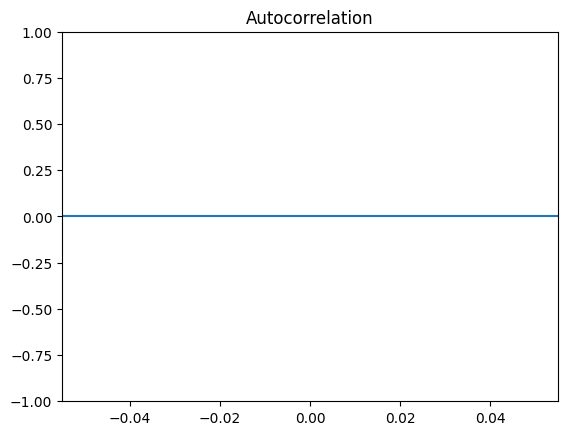

In [21]:
#Find the order of AR term (p)  
# Autocorrelation Function (ACF)

plot_acf(df.Sales.diff(), lags=3)
plt.show()                                      

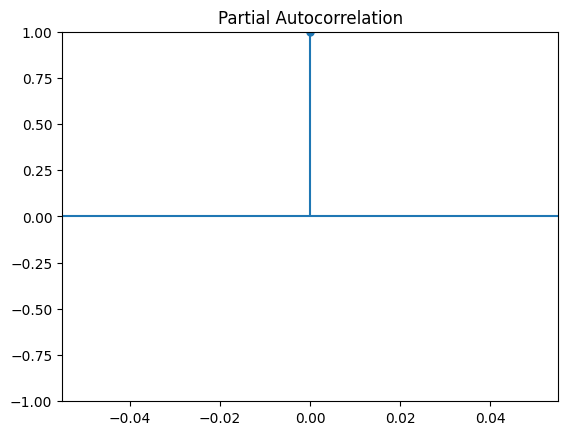

In [22]:
plot_pacf(df.Sales.diff(), lags=3)
plt.show()   

In [23]:
# 1,0,1 ARIMA Model
model = ARIMA(df2.Sales, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   18
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -290.543
Date:                Fri, 19 Jul 2024   AIC                            589.085
Time:                        10:11:47   BIC                            592.647
Sample:                             0   HQIC                           589.576
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.287e+06   5.08e+05     18.298      0.000    8.29e+06    1.03e+07
ar.L1         -0.7719      0.405     -1.907      0.057      -1.565       0.022
ma.L1          0.6180      0.622      0.994      0.3

/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [24]:
# Define the split index
split_index = int(0.8 * len(df2))

In [25]:
# Split the data
train = df2.Sales[:split_index]
test = df2.Sales[split_index:]

In [26]:
# Build Model
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit()  

# Summary of the model
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   14
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -226.653
Date:                Fri, 19 Jul 2024   AIC                            461.306
Time:                        10:11:47   BIC                            463.862
Sample:                             0   HQIC                           461.070
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.243e+06   6.36e+05     14.532      0.000       8e+06    1.05e+07
ar.L1         -0.7682      0.529     -1.452      0.147      -1.806       0.269
ma.L1          0.6226      0.801      0.778      0.4

/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [27]:
start = len(train)
end = start + len(test) - 1


predictions = fitted.predict(start=start, end=end, dynamic=False)

In [28]:
# # Forecasting 119 steps ahead (length of the test set)
# fc, se, conf = fitted.forecast(steps=6, alpha=0.05)  # 95% confidence interval

In [29]:
# Forecast the next 6 months
# future_steps = len(test)
future_steps = 6
forecast = fitted.get_forecast(steps=future_steps, alpha = 0.05) #95 conf

forecast_index = pd.date_range(start=test.index[-1], periods=future_steps + 1, freq='M')[1:]

forecast_series = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecasts and confidence intervals to numpy arrays
forecast_series = forecast_series.to_numpy()
forecast_conf_int = forecast_conf_int.to_numpy()

LowerCI = forecast_conf_int[:, 0]
UpperCI = forecast_conf_int[:, 1]

/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_8864/1026550344.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=test.index[-1], periods=future_steps + 1, freq='M')[1:]


In [30]:
# Combine the future forecast into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_series,
    'Lower CI': forecast_conf_int[:, 0],
    'Upper CI': forecast_conf_int[:, 1]
})

In [31]:
forecast_df

,Date,Forecast,Lower CI,Upper CI
0,1970-02-28 00:00:00.000000017,9.532804e+06,5.753585e+06,1.331202e+07
1,1970-03-31 00:00:00.000000017,9.020831e+06,5.201724e+06,1.283994e+07
2,1970-04-30 00:00:00.000000017,9.414148e+06,5.571693e+06,1.325660e+07
3,1970-05-31 00:00:00.000000017,9.111987e+06,5.255819e+06,1.296815e+07
4,1970-06-30 00:00:00.000000017,9.344119e+06,5.479880e+06,1.320836e+07
5,1970-07-31 00:00:00.000000017,9.165786e+06,5.296793e+06,1.303478e+07


<Axes: >

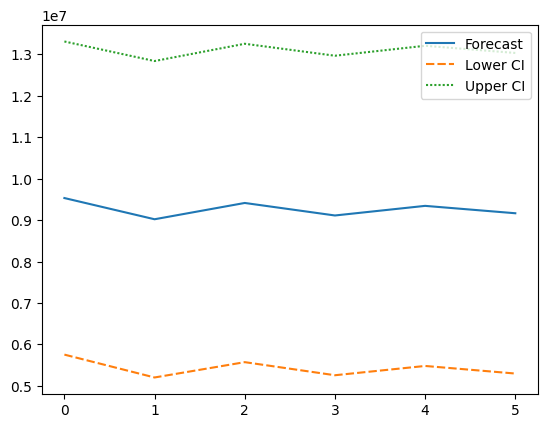

In [32]:
sns.lineplot(data=forecast_df)

In [33]:
print(forecast_df)

                           Date      Forecast      Lower CI      Upper CI
0 1970-02-28 00:00:00.000000017  9.532804e+06  5.753585e+06  1.331202e+07
1 1970-03-31 00:00:00.000000017  9.020831e+06  5.201724e+06  1.283994e+07
2 1970-04-30 00:00:00.000000017  9.414148e+06  5.571693e+06  1.325660e+07
3 1970-05-31 00:00:00.000000017  9.111987e+06  5.255819e+06  1.296815e+07
4 1970-06-30 00:00:00.000000017  9.344119e+06  5.479880e+06  1.320836e+07
5 1970-07-31 00:00:00.000000017  9.165786e+06  5.296793e+06  1.303478e+07


In [34]:
mape = np.mean(np.abs(predictions - test)/np.abs(test))
me = np.mean(predictions - test)
mae = mean_absolute_error(test,predictions)
rmse = root_mean_squared_error(test,predictions)
print('mape:'+ str(mape) +'\nmae:'+str(mae)+'\nrmse:'+str(rmse))

mape:0.11900323190190737
mae:1209374.4901120253
rmse:1553006.2761251512
